In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [48]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.shape)
print(test_data.shape)

(4209, 378)
(4209, 377)


In [49]:
for i in train_data.columns:
    data_type = train_data[i].dtype
    if data_type == 'object':
        print(i)

X0
X1
X2
X3
X4
X5
X6
X8


In [50]:
variance = pow(train_data.drop(columns={'ID','y'}).std(),2).to_dict()
null_cnt = 0
for key, value in variance.items():
    if(value==0):
        print('Name = ', key)
        null_cnt = null_cnt+1
        print('no of columns which has zero variance=', null_cnt)

Name =  X11
no of columns which has zero variance= 1
Name =  X93
no of columns which has zero variance= 2
Name =  X107
no of columns which has zero variance= 3
Name =  X233
no of columns which has zero variance= 4
Name =  X235
no of columns which has zero variance= 5
Name =  X268
no of columns which has zero variance= 6
Name =  X289
no of columns which has zero variance= 7
Name =  X290
no of columns which has zero variance= 8
Name =  X293
no of columns which has zero variance= 9
Name =  X297
no of columns which has zero variance= 10
Name =  X330
no of columns which has zero variance= 11
Name =  X347
no of columns which has zero variance= 12


In [51]:
train_data = train_data.drop(columns={'X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'})
train_data.shape
                                 

(4209, 366)

In [52]:
train_data.isnull().sum().any()

False

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
train_data_feature = train_data.drop(columns={'y','ID'})
train_data_target = train_data.y
print(train_data_feature.shape)
print(train_data_target.shape)
train_data_feature.describe(include='object')

(4209, 364)
(4209,)


X0    X1    X2    X3    X4    X5    X6    X8
count   4209  4209  4209  4209  4209  4209  4209  4209
unique    47    27    44     7     4    29    12    25
top        z    aa    as     c     d     w     g     j
freq     360   833  1659  1942  4205   231  1042   277

In [55]:
train_data_feature['X0'] = le.fit_transform(train_data_feature.X0)
train_data_feature['X1'] = le.fit_transform(train_data_feature.X1)
train_data_feature['X2'] = le.fit_transform(train_data_feature.X2)
train_data_feature['X3'] = le.fit_transform(train_data_feature.X3)
train_data_feature['X4'] = le.fit_transform(train_data_feature.X4)
train_data_feature['X5'] = le.fit_transform(train_data_feature.X5)
train_data_feature['X6'] = le.fit_transform(train_data_feature.X6)
train_data_feature['X8'] = le.fit_transform(train_data_feature.X8)

In [56]:
print(train_data_feature.shape)
print(train_data_target.shape)

(4209, 364)
(4209,)


In [57]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=.95)

In [58]:
pca.fit(train_data_feature, train_data_target)

PCA(n_components=0.95)

In [59]:
train_data_feature_trans=pca.fit_transform(train_data_feature)
print(train_data_feature_trans.shape)

(4209, 6)


In [60]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import numpy as np

In [61]:
train_x,test_x, train_y,test_y = train_test_split(train_data_feature_trans, train_data_target,test_size=.3, random_state=7)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2946, 6)
(2946,)
(1263, 6)
(1263,)


In [62]:
xgb_reg=xgb.XGBRegressor(objective='reg:linear', colsample_bytree = 0.3, learning_rate = 0.4, max_depth =10, alpha = 6, n_estimators = 20)
model = xgb_reg.fit(train_x, train_y)
print('RMSE = ', sqrt(mean_squared_error(model.predict(test_x),test_y)))

[19:43:48] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
RMSE =  12.237860466379919


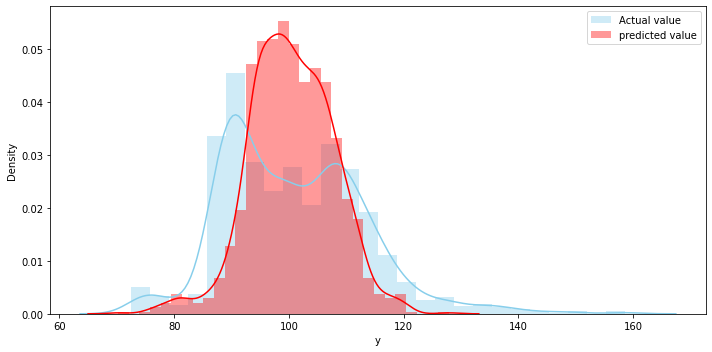

In [63]:
pred_test_y = model.predict(test_x)
plt.figure(figsize=(10,5))
sns.distplot(test_y[test_y<160], color="skyblue", label="Actual value")
sns.distplot(pred_test_y[pred_test_y<160], color="red", label = "predicted value")
plt.legend()

plt.tight_layout()

In [64]:
dmatrix_train = xgb.DMatrix(data=train_data_feature_trans,label=train_data_target)
params = {'objective':'reg:linear','colsample_bytree':0.3,'learning_rate':0.3, 'max_depth':5,'alpha':10}
model_cv = xgb.cv(dtrain=dmatrix_train, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=7)
model_cv.tail(4)

[19:43:48] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:48] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:48] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
26         9.218257        0.160321       11.033188       0.773833
27         9.169047        0.166877       11.030471       0.766388
28         9.085136        0.150843       11.034509       0.751673
29         9.045591        0.134536       11.028953       0.758330

In [65]:
test_data = test_data.drop(columns={'X11','X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'})
test_data.shape   

(4209, 365)

In [66]:
test_data.isnull().sum().any()

False

In [67]:
test_data_feature = test_data.drop(columns={'ID'})
print( test_data_feature.shape)

(4209, 364)


In [68]:
test_data_feature.describe(include='object')

X0    X1    X2    X3    X4    X5    X6    X8
count   4209  4209  4209  4209  4209  4209  4209  4209
unique    49    27    45     7     4    32    12    25
top       ak    aa    as     c     d     v     g     e
freq     432   826  1658  1900  4203   246  1073   274

In [72]:
test_data_feature['X0'] = le.fit_transform(test_data_feature.X0)
test_data_feature['X1'] = le.fit_transform(test_data_feature.X1)
test_data_feature['X2'] = le.fit_transform(test_data_feature.X2)
test_data_feature['X3'] = le.fit_transform(test_data_feature.X3)
test_data_feature['X4'] = le.fit_transform(test_data_feature.X4)
test_data_feature['X5'] = le.fit_transform(test_data_feature.X5)
test_data_feature['X6'] = le.fit_transform(test_data_feature.X6)
test_data_feature['X8'] = le.fit_transform(test_data_feature.X8)

In [73]:
pca.fit(test_data_feature)

PCA(n_components=0.95)

In [74]:
test_data_feature_trans = pca.fit_transform(test_data_feature)
print(test_data_feature_trans.shape)

(4209, 6)


In [75]:
test_pred = model.predict(test_data_feature_trans)
test_pred

array([ 80.20003 ,  92.969574, 101.64637 , ...,  95.79453 , 110.24724 ,
        98.970345], dtype=float32)

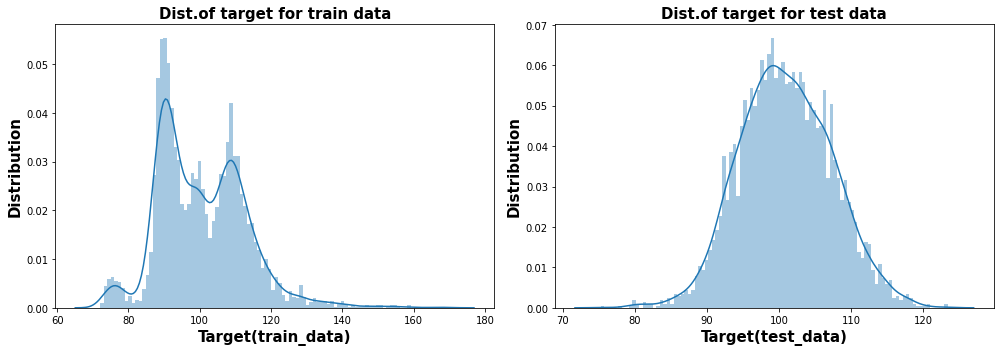

In [82]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

train_plot = sns.distplot(train_data_target[train_data_target<200], bins=100, kde=True, ax=ax[0])
train_plot.set_xlabel('Target(train_data)', weight='bold', size=15)
train_plot.set_ylabel('Distribution', weight='bold', size=15)
train_plot.set_title('Dist.of target for train data', weight='bold', size=15)

test_plot = sns.distplot(test_pred[test_pred<200], bins=100, kde=True, ax=ax[1])
test_plot.set_xlabel('Target(test_data)', weight='bold', size=15)
test_plot.set_ylabel('Distribution', weight='bold', size=15)
test_plot.set_title('Dist.of target for test data', weight='bold', size=15)

plt.tight_layout()